In [5]:
import os
from pathlib import Path
import sys
curdir = Path(os.getcwd())
sys.path.append(str(curdir.parent.absolute()))
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from src.utils.data import read_fasta
from src.data.datasets import ProteInferDataset
import numpy as np
from src.utils.data import read_pickle

In [13]:
embeddings = read_pickle('../data/proteinfer_results/proteinfer_embeddings.pkl')

In [14]:
len(embeddings)

522607

In [2]:
test_preds = np.load('../data/proteinfer_results/probas.npy')
test_labels = np.load('../data/proteinfer_results/labels.npy')

In [3]:
test_labels = test_labels.flatten()
test_preds = test_preds.flatten()

Bad pipe message: %s [b"\xe0]\xe0\xdd\x11\x00\x90<\xf4pi*\xc1\xa3+\n\x8e+\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08"]
Bad pipe message: %s [b'\x06\x04\x01\x05']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'', b'\x03\x03']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\xe2F\xe3\xe3\xea\xd9l\x8f\x94\x99\xa2\xcf\xed\xe1\x92\x85\xf1\xdb\x00

In [5]:
mask = test_preds>1e-3
test_labels = test_labels[mask]
test_preds = test_preds[mask]

In [6]:
from sklearn.metrics import precision_recall_curve

In [7]:

precision, recall, thresholds = precision_recall_curve(test_labels.flatten(),test_preds.flatten())

In [11]:
f1 = precision*recall*2/(precision+recall)

In [18]:
thresholds.shape

(727483,)

In [20]:
metrics_df = pd.DataFrame({'precision':precision[:-1],'recall':recall[:-1],'f1':f1[:-1],'thresholds':thresholds})

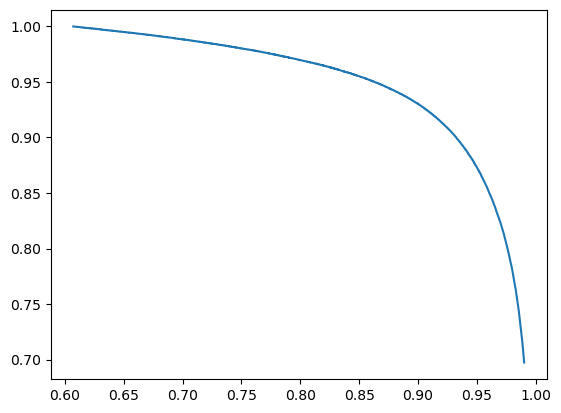

In [22]:
plt.plot(metrics_df['precision'],metrics_df['recall'])

In [21]:
metrics_df.sort_values(by='f1',ascending=False)

,precision,recall,f1,thresholds
629131,0.921198,0.912429,0.916793,0.910039
629129,0.921196,0.912430,0.916792,0.910034
629132,0.921198,0.912428,0.916792,0.910039
629128,0.921196,0.912430,0.916792,0.910034
629130,0.921196,0.912429,0.916792,0.910037
...,...,...,...,...
4,0.607240,1.000000,0.755630,0.001000
3,0.607239,1.000000,0.755630,0.001000
2,0.607238,1.000000,0.755630,0.001000
1,0.607238,1.000000,0.755629,0.001000


In [2]:
train = read_fasta('../data/swissprot/proteinfer_splits/random/train_GO.fasta')
val = read_fasta('../data/swissprot/proteinfer_splits/random/dev_GO.fasta')
test = read_fasta('../data/swissprot/proteinfer_splits/random/test_GO.fasta')

In [ ]:
train = [(k[0],j," ".join(k[1:])) for j,k in train]
test = [(k[0],j," ".join(k[1:])) for j,k in test]
val = [(k[0],j," ".join(k[1:])) for j,k in val]

df = train + val + test

In [4]:
df = pd.DataFrame(df,columns=['id','sequence','labels'])

In [5]:
num_sequences = len(df)
print('number of sequences:',num_sequences)

number of sequences: 522607


In [6]:
labels = Counter()

vocab = set()
amino_freq = Counter()
for idx,row in df.iterrows():
    sequence = row['sequence']
    row_labels = row['labels']
    aa_list = list(sequence)
    if row_labels =='':
        print(row['id'],row['labels'])
    vocab.update(aa_list)
    amino_freq.update(aa_list)
    labels.update(row_labels.split(" "))

In [7]:
print('# GO Terms:',len(labels.keys()))

# GO Terms: 32102


In [8]:
print('GO Terms distribution')
pd.Series(labels.values()).describe()

GO Terms distribution


count     32102.000000
mean        777.250545
std        9114.786603
min           1.000000
25%           4.000000
50%          17.000000
75%          84.000000
max      462356.000000
dtype: float64

In [9]:
print('Sequence length distribution')

df['sequence'].apply(len).describe()

Sequence length distribution


count    522607.000000
mean        368.042215
std         334.721845
min           2.000000
25%         179.000000
50%         303.000000
75%         456.000000
max       35213.000000
Name: sequence, dtype: float64

In [2]:
PD = ProteinDataset(data_path='../data/swissprot/proteinfer_splits/random/train_GO.fasta',
                    sequence_vocabulary_path='../data/vocabularies/amino_acid_vocab.json',
                    label_vocabulary_path='../data/vocabularies/GO_label_vocab.json')

In [3]:
test_seqs_preds = pd.read_csv('../proteinfer/hemoglobin_predictions.tsv',sep='\t')

In [4]:
PD.data = [i for i in PD.data if i[1][0] in ['P69891','Q7AP54']]

In [5]:
from sklearn.metrics import precision_score,recall_score

In [6]:
len(PD),PD.get_max_seq_len()

(2, 569)

In [7]:
from src.models.protein_encoders import ProteInfer
import torch
model = ProteInfer(num_labels=32102,
                      input_channels=20,
                      output_channels=1100,
                      kernel_size=9,
                      activation=torch.nn.ReLU,
                      dilation_base=3,
                      num_resnet_blocks=5,
                      bottleneck_factor=0.5)

from src.utils.proteinfer import transfer_tf_weights_to_torch
transfer_tf_weights_to_torch(model,'../models/proteinfer/GO_model_weights.pkl')

model.to('cuda:0')

Pytorch num variables: 74
Tensorflow num variables: 74


conv1.weight:torch.Size([1100, 20, 9]) <--> inferrer/conv1d/kernel:0:(1100, 20, 9)
conv1.bias:torch.Size([1100]) <--> inferrer/conv1d/bias:0:(1100,)
resnet_blocks.0.bn_activation_1.0.weight:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/gamma:0:(1100,)
resnet_blocks.0.bn_activation_1.0.bias:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/beta:0:(1100,)
resnet_blocks.0.bn_activation_1.0.running_mean:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/moving_mean:0:(1100,)
resnet_blocks.0.bn_activation_1.0.running_var:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/moving_variance:0:(1100,)
resnet_blocks.0.bn_activation_1.0.num_batches_tracked:torch.Size([]) <--> inferrer/residual_block_0/batch_normalization/num_batches_tracked:0:()
resnet_blocks.0.masked_conv1.weight:torch.Size([550, 1100, 9]) <--> inferrer/residual_block_0/conv1d/kernel:0:(550, 1

ProteInfer(
  (conv1): MaskedConv1D(20, 1100, kernel_size=(9,), stride=(1,), padding=same)
  (resnet_blocks): ModuleList(
    (0): Residual(
      (bn_activation_1): Sequential(
        (0): BatchNorm1d(1100, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (1): ReLU()
      )
      (masked_conv1): MaskedConv1D(1100, 550, kernel_size=(9,), stride=(1,), padding=same)
      (bn_activation_2): Sequential(
        (0): BatchNorm1d(550, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (1): ReLU()
      )
      (masked_conv2): MaskedConv1D(550, 1100, kernel_size=(1,), stride=(1,), padding=same)
    )
    (1): Residual(
      (bn_activation_1): Sequential(
        (0): BatchNorm1d(1100, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (1): ReLU()
      )
      (masked_conv1): MaskedConv1D(1100, 550, kernel_size=(9,), stride=(1,), padding=same, dilation=(3,))
      (bn_activation_2): Sequential(
        (0): BatchNorm1d(55

In [9]:
from torch.utils.data import DataLoader
from src.data.collators import collate_variable_sequence_length
PD_loader = DataLoader(dataset=PD,
                          batch_size=2,
                          shuffle=False,
                          num_workers=2,
                          collate_fn=collate_variable_sequence_length)

In [29]:
sd = model.state_dict()
sd['resnet_blocks.0.bn_activation_1.0.running_mean']

tensor([-0.7193, -0.8540, -0.7379,  ..., -0.8559, -0.7143, -0.8150],
       device='cuda:0')

In [10]:
model.eval()
with torch.no_grad():
    for i,s,l in PD_loader:
        logits = model(i.type(torch.FloatTensor).to('cuda:0'),s.to('cuda:0'))
        probas = torch.sigmoid(logits)
        above_th = (probas>0.5)*1


logits torch.Size([2, 32102]) tensor(-25.6217, device='cuda:0') tensor(-1645014.7500, device='cuda:0')


In [2]:
import torch
from src.models.protein_encoders import Residual,ProteInfer
i=torch.ones((8,20,100))
#r=Residual(input_channels=20,kernel_size=9,dilation=9,bottleneck_factor=0.5,activation = torch.nn.ReLU)
prot_enc = ProteInfer(num_labels=32102,input_channels=20,output_channels=1100,kernel_size=9,activation=torch.nn.ReLU,dilation_base=3,num_resnet_blocks=5,bottleneck_factor=0.5)
seqs_lengths = torch.tensor([80,20,5,100,95,80,20,5])
o=prot_enc(i,seqs_lengths)
o.shape

TypeError: conv1d(): argument 'padding' (position 5) must be tuple of ints, not str

In [3]:
from src.utils.proteinfer import transfer_tf_weights_to_torch
transfer_tf_weights_to_torch(prot_enc,'../models/proteinfer/GO_model_weights.pkl')

Pytorch num variables: 74
Tensorflow num variables: 74


conv1.weight:torch.Size([1100, 20, 9]) <--> inferrer/conv1d/kernel:0:(1100, 20, 9)
conv1.bias:torch.Size([1100]) <--> inferrer/conv1d/bias:0:(1100,)
resnet_blocks.0.bn_activation_1.0.weight:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/gamma:0:(1100,)
resnet_blocks.0.bn_activation_1.0.bias:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/beta:0:(1100,)
resnet_blocks.0.bn_activation_1.0.running_mean:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/moving_mean:0:(1100,)
resnet_blocks.0.bn_activation_1.0.running_var:torch.Size([1100]) <--> inferrer/residual_block_0/batch_normalization/moving_variance:0:(1100,)
resnet_blocks.0.bn_activation_1.0.num_batches_tracked:torch.Size([]) <--> inferrer/residual_block_0/batch_normalization/num_batches_tracked:0:()
resnet_blocks.0.masked_conv1.weight:torch.Size([550, 1100, 9]) <--> inferrer/residual_block_0/conv1d/kernel:0:(550, 1

In [4]:
prot_enc

ProteInfer(
  (conv1): MaskedConv1D(20, 1100, kernel_size=(9,), stride=(1,), padding=same)
  (resnet_blocks): ModuleList(
    (0): Residual(
      (bn_activation_1): Sequential(
        (0): BatchNorm1d(1100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
      )
      (masked_conv1): MaskedConv1D(1100, 550, kernel_size=(9,), stride=(1,), padding=same)
      (bn_activation_2): Sequential(
        (0): BatchNorm1d(550, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
      )
      (masked_conv2): MaskedConv1D(550, 1100, kernel_size=(1,), stride=(1,), padding=same)
    )
    (1): Residual(
      (bn_activation_1): Sequential(
        (0): BatchNorm1d(1100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU()
      )
      (masked_conv1): MaskedConv1D(1100, 550, kernel_size=(9,), stride=(1,), padding=same, dilation=(3,))
      (bn_activation_2): Sequential(
        (0): BatchNorm1d(550, 